# Supervised machine learning: Classification

Dataset Introduction
The dataset used here is Titanic - Machine Learning from Disaster. This dataset is used for an example for classification problems.
The datasets consists of the following columns

Features


> survival - 
This feature tells us whether the passenger survived or not. This feature is gonna be used for predicting  0 = No; 1 = Yes 

> PassengerId - 
ID of the observation

> pclass
 Passenger Class
(1 = 1st; 2 = 2nd; 3 = 3rd)


> name -
Name of the passenger

> sex-
Sex of the passenger

> Age-
Age of the passenger


>  sibsp -
Number of siblings or spouse traveling with the passenger

> parch -
Number of parents, children traveling with the passenger 

> ticket-
Ticket number of the passenger

>  fare -
Fare amount paid by the passenger

> cabin-
Cabin allocated for the passenger

> embarked -
Place of embarkment of the passenger
(C = Cherbourg; Q = Queenstown; S = Southampton)



Problem Statement - Predict survivability of a passenger based on the features
The models will be focus on prediction rather than interpretability 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/ibm/Projects/EDA/train(EDA).csv')

Intial exploration of data

In [7]:
print(data.shape)
print(data.columns.tolist())
print(data.dtypes)

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that the problem to solve here is to predict the survived column

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Feature deletion

FInding columns which has unique values for each observation

In [10]:
columnname = data.columns.to_list()
observation_length = data.shape[0]
dummies = []
for x in columnname:
  if len(data[x].unique()) == observation_length:
    dummies.append(x)
print(dummies)

['PassengerId', 'Name']


As they do not provide any useful info. We are gonna delete them

In [11]:
data1 = data.copy()
data1.drop(dummies, axis = 1, inplace = True)
data1.shape

(891, 10)

In [12]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


the ticket columns looks a little suspicious

In [13]:
data1['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

it has a huge number of unique values lets check them to see any order or categories

In [14]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Ticket columns doesnt seem to have any ordering or category, As this also doesnt give any useful info. We shall delete it also

In [15]:
data2 = data1.copy()
data2.drop(['Ticket'], axis = 1, inplace = True)
data2.shape

(891, 9)

# Exploratory data analysis and cleaning

## Numerical columns Analysis

In [16]:
numerical_cols = data2.select_dtypes('number').columns.tolist()
print(numerical_cols)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
data2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survived Column

In [18]:
data2['Survived'].isnull().sum()

0

In [19]:
data2['Survived'].unique()

array([0, 1])

col_0,count
Survived,
0,0.616162
1,0.383838


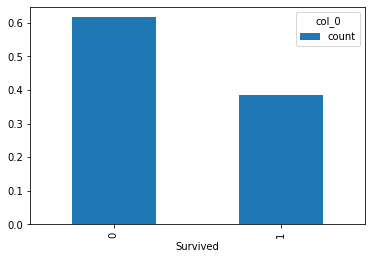

In [20]:
ct = pd.crosstab(index = data2['Survived'], columns = 'count')
ct = ct/data2.shape[0]
display(ct)
ct.plot(kind = 'bar')

We can see that around 61 % people died and around 38% people survived

### Pclass column

In [21]:
data2['Pclass'].isnull().sum()

0

In [22]:
data2['Pclass'].unique()

array([3, 1, 2])

col_0      count
Pclass          
1       0.242424
2       0.206510
3       0.551066


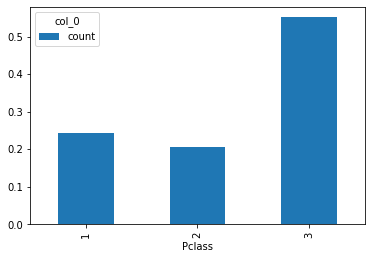

In [23]:
ct = pd.crosstab(index = data2['Pclass'], columns = 'count')
ct = ct/data2.shape[0]
print(ct)
ct.plot(kind = 'bar')

We can see that majority were of class 3

We can see there are 3 unique values for passenger class but these can be converted into categorical feature instead as they refer to a passenger class and also they also have an order to them 

In [24]:
Pclass = pd.Categorical(data2["Pclass"],
                           ordered=True)
Pclass.describe()

,counts,freqs
categories,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


In [25]:
data3 = data2.copy()
data3['Pclass'] = Pclass
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [26]:
# Do the one hot encoding
data3 = pd.get_dummies(data3, columns=['Pclass'])
data3.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


Lets see the survived ratio among the passenger classes

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


Pclass          1         2         3       All
Survived                                       
0         0.37037  0.527174  0.757637  0.616162
1         0.62963  0.472826  0.242363  0.383838
All       1.00000  1.000000  1.000000  1.000000
Pclass           1         2         3  All
Survived                                   
0         0.145719  0.176685  0.677596  1.0
1         0.397661  0.254386  0.347953  1.0
All       0.242424  0.206510  0.551066  1.0


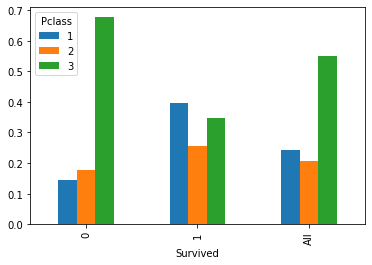

In [27]:
survived_pclass = pd.crosstab(index=data2["Survived"], 
                           columns=data2["Pclass"], margins = True)
display(survived_pclass/survived_pclass.loc["All","All"])
print(survived_pclass/survived_pclass.loc["All"])
survived_pclass = survived_pclass.div(survived_pclass["All"],
                   axis=0)
print(survived_pclass)

survived_pclass.pop('All')
survived_pclass.plot(kind = 'bar')

We can class 3 people have have died a lot when compared to other classes and class 1 people have survived the most when compared to other classes

### Age column

In [28]:
data3['Age'].isnull().sum()

177

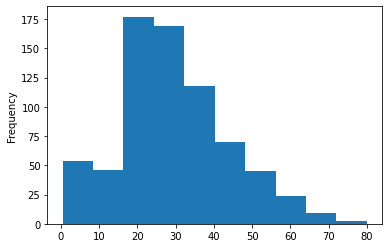

In [29]:
data3['Age'].plot(kind = 'hist')

as age follows a normal distribution we can switch out the nan values with mean

In [30]:
mean = np.nanmean(data3['Age'])
mean

29.69911764705882

In [31]:
data3['Age'].fillna(mean, inplace = True)

In [32]:
data3['Age'].isnull().sum()

0

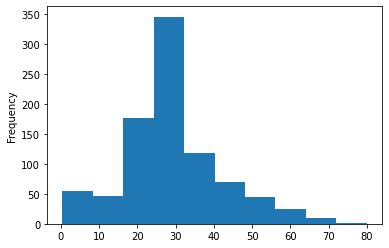

In [33]:
data3['Age'].plot(kind = 'hist')

In [34]:
data3.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


Using the original data lets what age range survived the most

In [35]:
dummydata = data2.dropna(subset = ["Age"])
dummydata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


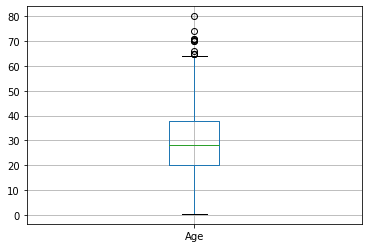

In [36]:
dummydata.boxplot(column = 'Age')

In [37]:
bins = [0,20,40,60,80,100,120]
labels = ['0-20','20-40','40-60','60-80','80-100','100+']

dummydata['Age_range'] = pd.cut(dummydata['Age'],bins = bins, labels = labels)
dummydata.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,NaN,S,20-40
1,1,1,female,38.0,1,0,71.2833,C85,C,20-40
2,1,3,female,26.0,0,0,7.9250,NaN,S,20-40
3,1,1,female,35.0,1,0,53.1000,C123,S,20-40
4,0,3,male,35.0,0,0,8.0500,NaN,S,20-40


In [38]:
dummydata['Age_range'].unique()

['20-40', '40-60', '0-20', '60-80']
Categories (6, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100+']

Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.135854,0.324930,0.109244,0.023810,0.593838
1,0.114846,0.214286,0.070028,0.007003,0.406162
All,0.250700,0.539216,0.179272,0.030812,1.000000


Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.541899,0.602597,0.609375,0.772727,0.593838
1,0.458101,0.397403,0.390625,0.227273,0.406162
All,1.000000,1.000000,1.000000,1.000000,1.000000


Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.228774,0.547170,0.183962,0.040094,1.0
1,0.282759,0.527586,0.172414,0.017241,1.0
All,0.250700,0.539216,0.179272,0.030812,1.0


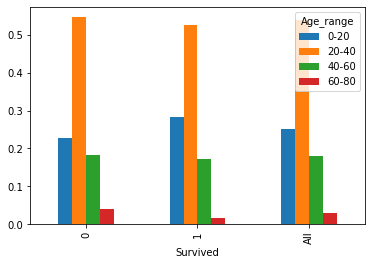

In [39]:
survived_age = pd.crosstab(index=dummydata["Survived"], 
                           columns=dummydata["Age_range"], margins = True)
display(survived_age/survived_age.loc["All","All"])
display(survived_age/survived_age.loc["All"])
survived_age = survived_age.div(survived_age["All"],
                   axis=0)
display(survived_age)

survived_age.pop('All')
survived_age.plot(kind = 'bar')

### Sibsp and parch column

In [40]:
data3['SibSp'].isnull().sum()

0

In [41]:
data3['Parch'].isnull().sum()

0

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


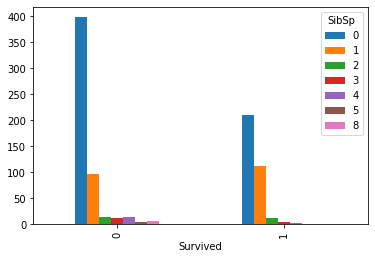

In [42]:
survived_SibSp = pd.crosstab(index=data3["Survived"], 
                           columns=data3["SibSp"])
display(survived_SibSp)
survived_SibSp.plot(kind = 'bar')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


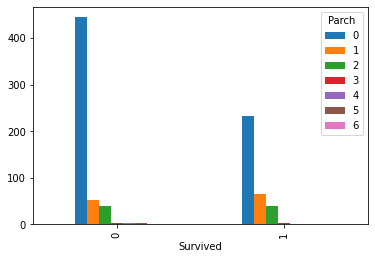

In [43]:
survived_parch = pd.crosstab(index=data3["Survived"], 
                           columns=data3["Parch"])
display(survived_parch)
survived_parch.plot(kind = 'bar')

In [44]:
def with_family(row):
  if (row['SibSp'] !=0) or (row['Parch'] != 0):
    return 1
  else:
    return 0

In [45]:
data4 = data3.copy()
data4['with_family'] = data3.apply(lambda row : with_family(row), axis = 1)
data4.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0,1
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1,0
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0,1
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1,0


with_family,0,1,All
Survived,,,
0,0.419753,0.196409,0.616162
1,0.182941,0.200898,0.383838
All,0.602694,0.397306,1.000000


with_family,0,1,All
Survived,,,
0,0.696462,0.49435,0.616162
1,0.303538,0.50565,0.383838
All,1.000000,1.00000,1.000000


with_family,0,1,All
Survived,,,
0,0.681239,0.318761,1.0
1,0.476608,0.523392,1.0
All,0.602694,0.397306,1.0


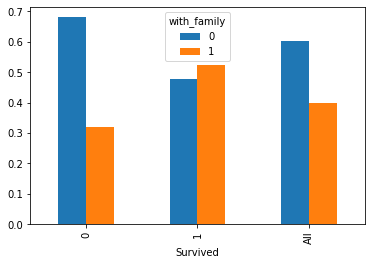

In [46]:
survived_fam = pd.crosstab(index=data4["Survived"], 
                           columns=data4["with_family"], margins = True)
display(survived_fam/survived_fam.loc["All","All"])
display(survived_fam/survived_fam.loc["All"])
survived_fam = survived_fam.div(survived_fam["All"],
                   axis=0)
display(survived_fam)
survived_fam.pop('All')
survived_fam.plot(kind = 'bar')

### fare column

In [47]:
data3['Fare'].isnull().sum()

0

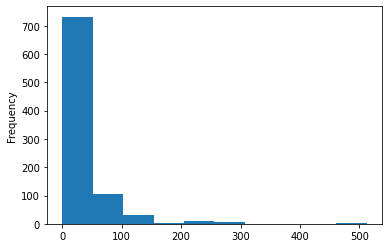

In [48]:
data3['Fare'].plot(kind = 'hist')

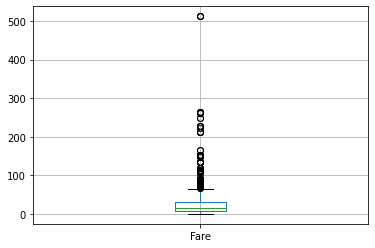

In [49]:
data3.boxplot(column = ['Fare'])

In [50]:
index = np.where(data4["Fare"] >100) 

data4.loc[index]

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family
27,0,male,19.000000,3,2,263.0000,C23 C25 C27,S,1,0,0,1
31,1,female,29.699118,1,0,146.5208,B78,C,1,0,0,1
88,1,female,23.000000,3,2,263.0000,C23 C25 C27,S,1,0,0,1
118,0,male,24.000000,0,1,247.5208,B58 B60,C,1,0,0,1
195,1,female,58.000000,0,0,146.5208,B80,C,1,0,0,0
215,1,female,31.000000,1,0,113.2750,D36,C,1,0,0,1
258,1,female,35.000000,0,0,512.3292,NaN,C,1,0,0,0
268,1,female,58.000000,0,1,153.4625,C125,S,1,0,0,1
269,1,female,35.000000,0,0,135.6333,C99,S,1,0,0,0
297,0,female,2.000000,1,2,151.5500,C22 C26,S,1,0,0,1


we can see that extra money was payed for passenger class 1 .This outliers gives us this info so we donot the change the outlier

In [51]:
data4.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,with_family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.397306
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.489615
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [52]:
bins = [0,20,40,60,80,100,520]
labels = ['0-20','20-40','40-60','60-80','80-100','100-520']

fare_range = pd.cut(data4['Fare'],bins = bins, labels = labels)


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.408676,0.130137,0.026256,0.026256,0.003425,0.015982,0.610731
1,0.162100,0.098174,0.035388,0.028539,0.020548,0.044521,0.389269
All,0.570776,0.228311,0.061644,0.054795,0.023973,0.060502,1.000000


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.716,0.57,0.425926,0.479167,0.142857,0.264151,0.610731
1,0.284,0.43,0.574074,0.520833,0.857143,0.735849,0.389269
All,1.000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.669159,0.213084,0.042991,0.042991,0.005607,0.026168,1.0
1,0.416422,0.252199,0.090909,0.073314,0.052786,0.114370,1.0
All,0.570776,0.228311,0.061644,0.054795,0.023973,0.060502,1.0


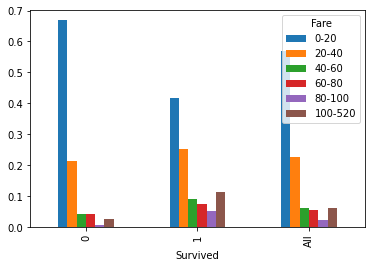

In [53]:
survived_fare = pd.crosstab(index=data4["Survived"], 
                           columns=fare_range, margins = True)
display(survived_fare/survived_fare.loc["All","All"])
display(survived_fare/survived_fare.loc["All"])
survived_fare = survived_fare.div(survived_fare["All"],
                   axis=0)
display(survived_fare)
survived_fare.pop('All')
survived_fare.plot(kind = 'bar')

## categorical columns

In [54]:
categorical_cols = data2.dtypes[data.dtypes == "object"].index
print(categorical_cols)


Index(['Sex', 'Cabin', 'Embarked'], dtype='object')


### Sex column

In [55]:
data4['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
data4['Sex'].isnull().sum()

0

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


Sex,female,male,All
Survived,,,
0,0.257962,0.811092,0.616162
1,0.742038,0.188908,0.383838
All,1.000000,1.000000,1.000000


Sex,female,male,All
Survived,,,
0,0.147541,0.852459,1.0
1,0.681287,0.318713,1.0
All,0.352413,0.647587,1.0


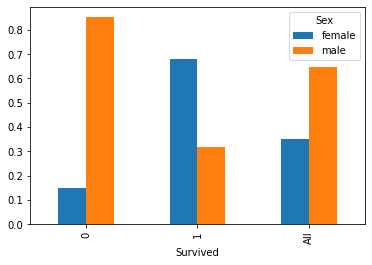

In [57]:
surviver_sex = pd.crosstab(index=data4["Survived"], 
                           columns=data['Sex'], margins = True)
display(surviver_sex/surviver_sex.loc["All","All"])
display(surviver_sex/surviver_sex.loc["All"])
surviver_sex = surviver_sex.div(surviver_sex["All"],
                   axis=0)
display(surviver_sex)
surviver_sex.pop('All')
surviver_sex.plot(kind = 'bar')

In [58]:
# Do the one hot encoding
data4 = pd.get_dummies(data4, columns=['Sex'])
data4.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,0,1


### Cabin

In [59]:
data4['Cabin'].isnull().sum()

687

In [60]:
data4['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

even though this has a lot of nan values we cant delete this columns because dependind on which deck got flooded first the survival will on that so we assign a new cabin called a No cabin to this column for nan
and also there seems to be repeating cabin letters which are unique so we can filter out the numbers

In [61]:
cabin = data4["Cabin"].astype(str) 

Cabin = np.array([obs[0] for obs in cabin])
ct = pd.crosstab(index = Cabin, columns = 'count')
display(ct)
Cabin = pd.Categorical(Cabin)

data5 = data4.copy()
data5['Cabin'] = Cabin
data5 = pd.get_dummies(data5, columns=['Cabin'])
data5.head()

col_0,count
row_0,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
n,687


,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family,...,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
0,0,22.0,1,0,7.2500,S,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,S,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,S,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.008979,0.013468,0.026936,0.008979,0.008979,0.005612,0.002245,0.001122,0.539843,0.616162
1,0.007856,0.039282,0.039282,0.028058,0.026936,0.008979,0.002245,0.000000,0.231201,0.383838
All,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,1.000000


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,1.0,0.700146,0.616162
1,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0,0.299854,0.383838
All,1.000000,1.000000,1.00000,1.000000,1.00,1.000000,1.0,1.0,1.000000,1.000000


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.014572,0.021858,0.043716,0.014572,0.014572,0.009107,0.003643,0.001821,0.876138,1.0
1,0.020468,0.102339,0.102339,0.073099,0.070175,0.023392,0.005848,0.000000,0.602339,1.0
All,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,1.0


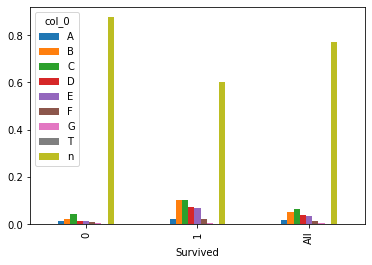

In [62]:
surviver_cabin = pd.crosstab(index=data4["Survived"], 
                           columns=Cabin, margins = True)
display(surviver_cabin/surviver_cabin.loc["All","All"])
display(surviver_cabin/surviver_cabin.loc["All"])
surviver_cabin = surviver_cabin.div(surviver_cabin["All"],
                   axis=0)
display(surviver_cabin)
surviver_cabin.pop('All')
surviver_cabin.plot(kind = 'bar')

### embark column

In [63]:
data5['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [64]:
data5['Embarked'].isnull().sum()

2

Embarked,C,Q,S,All
Survived,,,,
0,0.084364,0.052868,0.480315,0.617548
1,0.104612,0.033746,0.244094,0.382452
All,0.188976,0.086614,0.724409,1.000000


Embarked,C,Q,S,All
Survived,,,,
0,0.446429,0.61039,0.663043,0.617548
1,0.553571,0.38961,0.336957,0.382452
All,1.000000,1.00000,1.000000,1.000000


Embarked,C,Q,S,All
Survived,,,,
0,0.136612,0.085610,0.777778,1.0
1,0.273529,0.088235,0.638235,1.0
All,0.188976,0.086614,0.724409,1.0


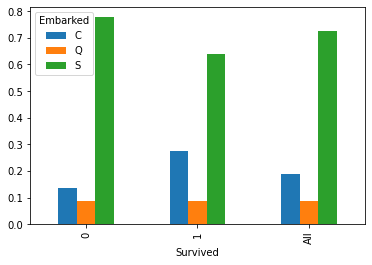

In [65]:
surviver_embarked = pd.crosstab(index=data4["Survived"], 
                           columns=data['Embarked'], margins = True)
display(surviver_embarked/surviver_embarked.loc["All","All"])
display(surviver_embarked/surviver_embarked.loc["All"])
surviver_embarked = surviver_embarked.div(surviver_embarked["All"],
                   axis=0)
display(surviver_embarked)
surviver_embarked.pop('All')
surviver_embarked.plot(kind = 'bar')

In [66]:
# Do the one hot encoding
data6 = data5.copy()
data6 = pd.get_dummies(data6, columns=['Embarked'])
data6.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,with_family,Sex_female,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


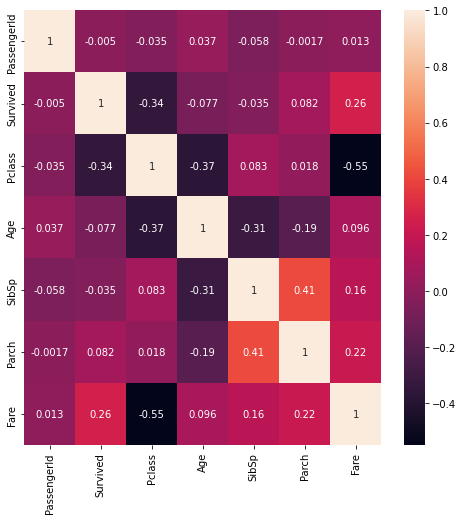

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True, ax = ax)


## Hypothesis testing

### H0: Data is normally distributed H1: Data is not normally distributed

In [68]:
import scipy.stats as ss

In [69]:
dummy = data[data['Age'].notna()].Age

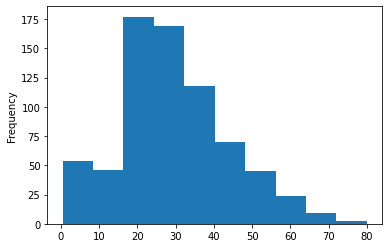

In [70]:
dummy.plot(kind = 'hist')

In [71]:
from scipy.stats import normaltest
stat, pvalue = normaltest(dummy)
print(stat, pvalue)
if pvalue<0.05:
  print("not a normal distribution")
else:
  print("Normal distribution")

18.105032952089758 0.00011709599657350757
not a normal distribution


We apply boxcox to make the data normally distributed

In [72]:
from scipy.stats import boxcox

In [73]:
normal_Age = boxcox(dummy)

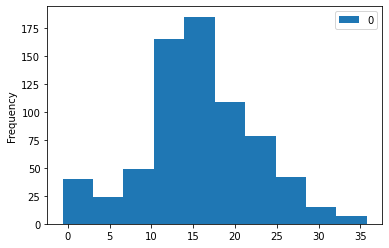

In [74]:
pd.DataFrame(normal_Age[0]).plot(kind = 'hist')

In [75]:
from scipy.stats import normaltest
stat, pvalue = normaltest(normal_Age[0])
print(stat, pvalue)
if pvalue<0.05:
  print("not a normal distribution")
else:
  print("Normal distribution")

1.2384147036970252 0.5383710072962454
Normal distribution


### H0: Sex doesnt matters for survival H1:Sex matters for survival

In [76]:
surviver_sex = pd.crosstab(index=data4["Survived"], 
                           columns=data['Sex'])

In [77]:
surviver_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [78]:
from scipy.stats import chi2_contingency
stat, p,dof, expected = chi2_contingency(surviver_sex)
print(p)
if p <0.05:
  print('Sex matters in terms of survival')
else:
  print('Sex doesnt matter for survival')

1.1973570627755645e-58
Sex matters in terms of survival


### H0:there is no relationship between age and fare H1: there is a relationship between age and fare

In [79]:
from scipy.stats import spearmanr
coef, p = spearmanr(data6[1:60]['Age'], data6[1:60]['Fare'])
print(p)
if p<0.05:
  print('there is a relationship between age and Fare')
else:
  print('there is no relationship between age and fare')

0.47931972164440195
there is no relationship between age and fare


# Data splitting

In [80]:
feature_cols = list(data6.columns)
feature_cols.remove('Survived')
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_index, test_index = next(strat_shuf_split.split(data6[feature_cols], data6.Survived))

# Create the dataframes
X_train = data6.loc[train_index, feature_cols]
y_train = data6.loc[train_index, 'Survived']

X_test  = data6.loc[test_index, feature_cols]
y_test  = data6.loc[test_index, 'Survived']
len(X_test), len(X_train)

(268, 623)

In [81]:
X = data6[feature_cols]
y = data6['Survived']

# Logistic Regression

Choosing best scaling method

In [164]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = LogisticRegression()
scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  scores[key] = roc_auc_score(y_test, predictions)

for key, val in scores.items():
  print(key, val)



standarsScaling 0.7901441600470727
minmaxScaling 0.7822594880847309
robustScaling 0.7931744630773758


robustScaling works best for logistic regression model

Hyperparameter tuning for polynomial features

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
sf = StratifiedKFold(n_splits=3, shuffle = True, random_state=72018)
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("LogisticRegression", LogisticRegression(max_iter = 10000000))])
params = {"Polynomial__degree":np.arange(1,5,1),
          "LogisticRegression__solver":["liblinear"]}
grid = GridSearchCV(estimator, params, cv =sf, scoring = 'accuracy' )
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'LogisticRegression__solver': 'liblinear', 'Polynomial__degree': 1} 0.8058361391694725


hyperparameter tuning of logistic regression

In [88]:
params = {"LogisticRegression__C": np.logspace(-4, 4, 20),
          "LogisticRegression__penalty":['l1','l2'],
          "LogisticRegression__solver": ["liblinear"]}
estimator = Pipeline([("RobustScaler",RobustScaler()),
                      ("LogisticRegression", LogisticRegression())])
grid = GridSearchCV(estimator, params, cv=sf, scoring = 'accuracy')
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)
C = grid.best_params_['LogisticRegression__C']
penalty = grid.best_params_['LogisticRegression__penalty']
solver = grid.best_params_['LogisticRegression__solver']
lr = LogisticRegression(C = C, penalty = penalty, solver = solver)
lr.fit(X_train, y_train)


{'LogisticRegression__C': 0.615848211066026, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'liblinear'} 0.809203142536476


LogisticRegression(C=0.615848211066026, solver='liblinear')

Model evaluation

In [156]:
pred_lr = lr.predict(X_test)
metrics = pd.DataFrame()
precision_lr, recall_lr, f1score, _ = score(y_test,pred_lr,average='weighted')
# adding lr stats to metrics DataFrame
lr_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':accuracy_score(y_test, pred_lr),
                      'f1score':f1_score(y_test, pred_lr,average='weighted'),
                      'auc': roc_auc_score(y_test, pred_lr,average='weighted')},
                     name='Logistic Regression')
# Report outcomes
display(lr_stats)
print(classification_report(y_test, pred_lr))

precision    0.815939
recall       0.817164
accuracy     0.817164
f1score      0.816255
auc          0.802265
Name: Logistic Regression, dtype: float64

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       165
           1       0.78      0.74      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [116]:
score_lr_train=np.mean(cross_val_score(tree, X_train, y_train, cv=sf, scoring='accuracy'))
print("Training Accuracy is : ",score_lr_train)
score_lr_test=np.mean(cross_val_score(tree, X_test, y_test, cv=sf, scoring='accuracy'))
print("Testing Accuracy is : ",score_lr_test)

Training Accuracy is :  0.7881518642388207
Testing Accuracy is :  0.7984602580108199


# KNN classifier

Scaling Selection

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = KNeighborsClassifier()
scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  scores[key] = roc_auc_score(y_test, predictions)

for key, val in scores.items():
  print(key, val)



standarsScaling 0.7616357752280083
minmaxScaling 0.7537216828478965
robustScaling 0.7337157987643426


hyperparameter tuning for polynomial features

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
sf = StratifiedKFold(n_splits=3, shuffle = True, random_state=72018)
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("StandardScaler",StandardScaler()),
                      ("LogisticRegression", KNeighborsClassifier())])
params = {"Polynomial__degree":np.arange(1,5,1)}
grid = GridSearchCV(estimator, params, cv =sf, scoring = 'accuracy' )
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Polynomial__degree': 1} 0.7845117845117845


hyperparamter tuning of KNN

In [94]:
params = {"KNN__n_neighbors":np.arange(1,30,1)}
estimator = Pipeline([("StandardScaler",StandardScaler()),
                      ("KNN", KNeighborsClassifier())])
grid = GridSearchCV(estimator, params, cv=sf, scoring = 'accuracy')
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)
C = grid.best_params_['KNN__n_neighbors']

knn = KNeighborsClassifier(n_neighbors=C)
knn.fit(X_train, y_train)


{'KNN__n_neighbors': 12} 0.7968574635241302


KNeighborsClassifier(n_neighbors=12)

Model evaluation


In [196]:
pred_knn = knn.predict(X_test)
precision_lr, recall_lr, f1score, _ = score(y_test,pred_knn,average='weighted')
# adding lr stats to metrics DataFrame
knn_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':accuracy_score(y_test, pred_knn),
                      'f1score':f1_score(y_test, pred_knn,average='weighted'),
                      'auc': roc_auc_score(y_test, pred_knn,average='weighted')},
                     name='KNN')
# Report outcomes
display(knn_stats)
print(classification_report(y_test, pred_knn))

precision    0.674231
recall       0.682836
accuracy     0.682836
f1score      0.673237
auc          0.643925
Name: KNN, dtype: float64

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       165
           1       0.61      0.48      0.54       103

    accuracy                           0.68       268
   macro avg       0.66      0.64      0.65       268
weighted avg       0.67      0.68      0.67       268



In [118]:
score_knn_train=np.mean(cross_val_score(knn, X_train, y_train, cv=sf, scoring='accuracy'))
print("Training Accuracy is : ",score_knn_train)
score_knn_test=np.mean(cross_val_score(knn, X_test, y_test, cv=sf, scoring='accuracy'))
print("Testing Accuracy is : ",score_knn_test)

Training Accuracy is :  0.6950250836120402
Testing Accuracy is :  0.5969621306699958


# SVM

Scaling Selection

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = SVC()
scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  scores[key] = roc_auc_score(y_test, predictions)

for key, val in scores.items():
  print(key, val)



standarsScaling 0.7470726684318918
minmaxScaling 0.7719035010297147
robustScaling 0.794380700205943


Hyperparameter tuning for polynomial features

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
sf = StratifiedKFold(n_splits=3, shuffle = True, random_state=72018)
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("svn", SVC())])
params = {"Polynomial__degree":np.arange(1,5,1)}
grid = GridSearchCV(estimator, params, cv =sf, scoring = 'accuracy' )
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Polynomial__degree': 1} 0.8103254769921436


hyperparameter tuning for svm

In [98]:
estimator = Pipeline([("RobustScaler",RobustScaler()),
                      ("svn", SVC())])
params = {"svn__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "svn__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "svn__kernel":('linear', 'poly', 'rbf'),
         }
grid = GridSearchCV(estimator, params, cv =sf, scoring = 'accuracy' )
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

C = grid.best_params_['svn__C']
gamma = grid.best_params_['svn__gamma']
kernel = grid.best_params_['svn__kernel']

svm = SVC(C = C,gamma = gamma, kernel = kernel)
svm.fit(X_train, y_train)

{'svn__C': 1, 'svn__gamma': 0.25, 'svn__kernel': 'rbf'} 0.8181818181818182


SVC(C=1, gamma=0.25)

Model evaluation

In [155]:
pred_svm = svm.predict(X_test)
precision_lr, recall_lr, f1score, _ = score(y_test,pred_svm,average='weighted')
svm_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':accuracy_score(y_test, pred_svm),
                      'f1score':f1_score(y_test, pred_svm,average='weighted'),
                      'auc': roc_auc_score(y_test, pred_svm,average='weighted')},
                     name='Support vector machine')
# Report outcomes
display(svm_stats)
print(classification_report(y_test, pred_svm))

precision    0.652488
recall       0.664179
accuracy     0.664179
f1score      0.640135
auc          0.606884
Name: Support vector machine, dtype: float64

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       165
           1       0.61      0.36      0.45       103

    accuracy                           0.66       268
   macro avg       0.64      0.61      0.60       268
weighted avg       0.65      0.66      0.64       268



In [154]:
score_svm_train=np.mean(cross_val_score(svm, X_train, y_train, cv=sf, scoring='accuracy'))
print("Training Accuracy is : ",score_svm_train)
score_svm_test=np.mean(cross_val_score(svm, X_test, y_test, cv=sf, scoring='accuracy'))
print("Testing Accuracy is : ",score_svm_test)

Training Accuracy is :  0.6709479127957388
Testing Accuracy is :  0.6156471077819393


Testing Accuracy is :  0.6156471077819393


# Decision tree

Scaling selection

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = DecisionTreeClassifier()
scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  scores[key] = roc_auc_score(y_test, predictions)

for key, val in scores.items():
  print(key, val)



standarsScaling 0.7464548396587232
minmaxScaling 0.7318917328626066
robustScaling 0.7306854957340395


Hyperparameter tuning for polynomial features

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
sf = StratifiedKFold(n_splits=3, shuffle = True, random_state=72018)
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("Scaler",StandardScaler()),
                      ("DT", DecisionTreeClassifier())])
params = {"Polynomial__degree":np.arange(1,5,1)}
grid = GridSearchCV(estimator, params, cv =sf, scoring = 'accuracy' )
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Polynomial__degree': 2} 0.7789001122334457


hyperparameter tuning for decision trees

In [132]:
params = {"dt__criterion":("gini", "entropy"), 
          "dt__splitter":("best", "random"), 
          "dt__max_depth":(list(range(1, 25))), 
          "dt__min_samples_split":[2, 3, 4], 
          "dt__min_samples_leaf":list(range(1, 20))
          }
estimator = Pipeline([("Polynomial",PolynomialFeatures(degree=2)),("Scaler",StandardScaler()),
                      ("dt",  DecisionTreeClassifier(random_state=42))])
grid = GridSearchCV(estimator, params, scoring="accuracy",cv=sf)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)
criterion = grid.best_params_['dt__criterion']
splitter = grid.best_params_['dt__splitter']
max_depth = grid.best_params_['dt__max_depth']
min_samples_split = grid.best_params_['dt__min_samples_split']
min_samples_leaf = grid.best_params_['dt__min_samples_leaf']


{'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2, 'dt__splitter': 'random'} 0.8204264870931537


In [133]:
tree = DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf )
tree.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       splitter='random')

In [150]:
pred_dt = tree.predict(X_test)
precision_lr, recall_lr, f1score, _ = score(y_test,pred_dt,average='weighted')
dt_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':accuracy_score(y_test, pred_dt),
                      'f1score':f1_score(y_test, pred_dt,average='weighted'),
                      'auc': roc_auc_score(y_test, pred_dt,average='weighted')},
                     name='decision Tree')
# Report outcomes
display(dt_stats)
print(classification_report(y_test, pred_dt))

precision    0.795415
recall       0.794776
accuracy     0.794776
f1score      0.788565
auc          0.762195
Name: KNN, dtype: float64

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       165
           1       0.80      0.62      0.70       103

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.80      0.79      0.79       268



In [153]:
score_tree_train=np.mean(cross_val_score(tree, X_train, y_train, cv=sf, scoring='accuracy'))
print("Training Accuracy is : ",score_tree_train)
score_tree_test=np.mean(cross_val_score(tree, X_test, y_test, cv=sf, scoring='accuracy'))
print("Testing Accuracy is : ",score_tree_test)

Training Accuracy is :  0.7817106404062927
Testing Accuracy is :  0.7908447773616314


# RandomForest

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = RandomForestClassifier()
scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  scores[key] = roc_auc_score(y_test, predictions)

for key, val in scores.items():
  print(key, val)



standarsScaling 0.7622241835834069
minmaxScaling 0.7701088555457488
robustScaling 0.7670785525154457


In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


estimator = Pipeline([("Polynomial",PolynomialFeatures(degree=2)),("Scaler",MinMaxScaler()),
                      ("rf",  RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1))])
params = {"rf__criterion":("gini", "entropy"),  
          "rf__max_depth":(list(range(1, 25))), 
          "rf__min_samples_split":[2, 3, 4,10,12,16], 
          "rf__min_samples_leaf":list(range(1, 20)),
          "rf__n_estimators": [50, 100, 400, 700, 1000]
          }


grid = GridSearchCV(estimator, params, scoring='accuracy', cv=sf, n_jobs=-1)

grid = grid.fit(X, y)

print( grid.best_score_, grid.best_params_,)




0.838383838384 {'min_samples_split': 10, 'n_estimators': 700, 'criterion': 'gini', 'min_samples_leaf': 1}


In [144]:
rfc = RandomForestClassifier(min_samples_split = 10, n_estimators = 700, criterion = 'gini',min_samples_leaf= 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700)

In [151]:
pred_rfc = rfc.predict(X_test)
precision_lr, recall_lr, f1score, _ = score(y_test,pred_rfc,average='weighted')

rfc_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':accuracy_score(y_test, pred_rfc),
                      'f1score':f1_score(y_test, pred_rfc,average='weighted'),
                      'auc': roc_auc_score(y_test, pred_rfc,average='weighted')},
                     name='Random forest')
# Report outcomes
display(rfc_stats)
print(classification_report(y_test, pred_rfc))

precision    0.809013
recall       0.809701
accuracy     0.809701
f1score      0.805805
auc          0.783436
Name: Random forest, dtype: float64

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.80      0.67      0.73       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



In [152]:
score_rfc_train=np.mean(cross_val_score(rfc, X_train, y_train, cv=sf, scoring='accuracy'))
print("Training Accuracy is : ",score_rfc_train)
score_rfc_test=np.mean(cross_val_score(rfc, X_test, y_test, cv=sf, scoring='accuracy'))
print("Testing Accuracy is : ",score_rfc_test)

Training Accuracy is :  0.8009801189149015
Testing Accuracy is :  0.813358302122347


# Model selection

In [187]:
training = [score_lr_train, score_knn_train, score_svm_train, score_tree_train, score_rfc_train]
testing = [score_lr_test, score_knn_test, score_svm_test, score_tree_test, score_rfc_test]

In [192]:
accuracy = pd.DataFrame([training, testing], columns = ['LogisticRegression','K neighbours','Support vector machine','Decision tree', 'Random forest classifier'], index =  ['Training','Testing'])

In [163]:
metrics = pd.DataFrame()
metrics.append([lr_stats.T, knn_stats.T,svm_stats.T,dt_stats.T, rfc_stats.T])


,precision,recall,accuracy,f1score,auc
Logistic Regression,0.815939,0.817164,0.817164,0.816255,0.802265
KNN,0.674231,0.682836,0.682836,0.673237,0.643925
Support vector machine,0.652488,0.664179,0.664179,0.640135,0.606884
KNN,0.795415,0.794776,0.794776,0.788565,0.762195
Random forest,0.809013,0.809701,0.809701,0.805805,0.783436


In [194]:
accuracy.T

,Training,Testing
LogisticRegression,0.788152,0.798460
K neighbours,0.695025,0.596962
Support vector machine,0.670948,0.615647
Decision tree,0.781711,0.790845
Random forest classifier,0.800980,0.813358


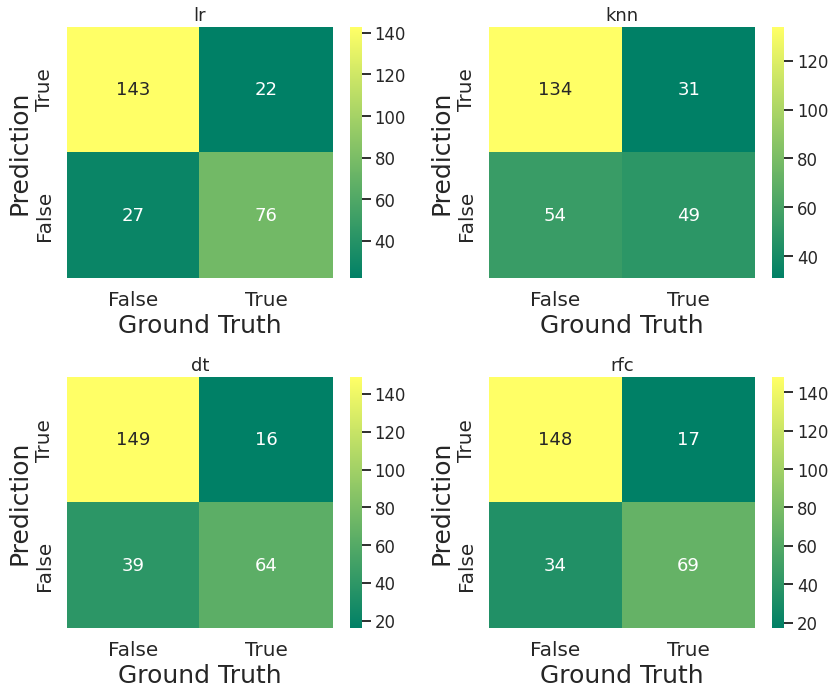

In [198]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['lr', 'knn', 'dt', 'rfc']
cm = [confusion_matrix(y_test, pred_lr),
      confusion_matrix(y_test, pred_knn),
      confusion_matrix(y_test, pred_dt),
      confusion_matrix(y_test, pred_rfc)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer');
    ax.set(title=model);
    ax.set_xticklabels(labels, fontsize=20);
    ax.set_yticklabels(labels[::-1], fontsize=20);
    ax.set_ylabel('Prediction', fontsize=25);
    ax.set_xlabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

Thus gonna select Logistic regression as my final model

# Conclusion

In these projects we were able to create 5 different models to classify if a person survived or not
The final model had the following stats

In [200]:
lr_stats


precision    0.815939
recall       0.817164
accuracy     0.817164
f1score      0.816255
auc          0.802265
Name: Logistic Regression, dtype: float64

# Next steps

We can look into feature importance and discard some of the feature to improve the prediction
We can also apply boosting , bagging and Stackin to improve the performance